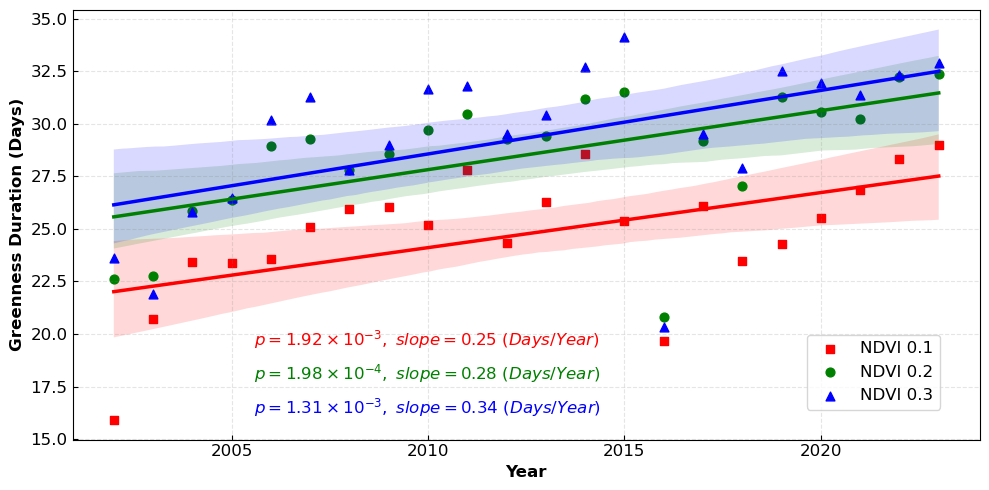

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymannkendall as mk

# === Load the data ===
df = pd.read_csv("G:/Hangkai/Antarctica_Mapping_Data/mean_greenness_duration_by_threshold.csv")
df.rename(columns={'Unnamed: 0': 'Year'}, inplace=True)

# Melt the DataFrame to long format for seaborn
df_melt = df.melt(id_vars='Year', var_name='Threshold', value_name='Duration')
df_melt['Threshold'] = df_melt['Threshold'].str.replace("NDVI_", "NDVI ")

# === Plotting ===
fig, ax = plt.subplots(figsize=(10, 5))

colors = {
    "NDVI 0.1": "red",
    "NDVI 0.2": "green",
    "NDVI 0.3": "blue"
}
markers = {
    "NDVI 0.1": "s",
    "NDVI 0.2": "o",
    "NDVI 0.3": "^"
}
text_y_locs = {
    "NDVI 0.1": 0.22,
    "NDVI 0.2": 0.14,
    "NDVI 0.3": 0.06
}

# Plot each threshold group
for threshold in df_melt['Threshold'].unique():
    data = df_melt[df_melt['Threshold'] == threshold]
    x = data['Year']
    y = data['Duration']

    # Mann-Kendall test
    result = mk.original_test(y)
    p = result.p
    slope = result.slope

    # Format p-value
    if p >= 0.01:
        p_str = f"{p:.2f}"
    else:
        p_sci = "{:.2e}".format(p)
        mantissa, exponent = p_sci.split("e")
        exponent = int(exponent)
        p_str = f"{mantissa}×10$^{{{exponent}}}$"

    # Combined annotation
    text_str = f"$p = {mantissa}\\times10^{{{exponent}}}, $ $slope = {slope:.2f}$ $ (Days/Year)$"

    # Plot scatter and regression
    ax.scatter(x, y, s=40, marker=markers[threshold], color=colors[threshold], label=threshold)
    sns.regplot(x=x, y=y, ax=ax, ci=95, scatter=False,
                line_kws={'color': colors[threshold], 'lw': 2.5})

    # Add p-value and slope text
    ax.text(0.2, text_y_locs[threshold], text_str, transform=ax.transAxes,
            fontsize=12, color=colors[threshold])

# === Final formatting ===
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Greenness Duration (Days)', fontsize=12, fontweight='bold')
ax.tick_params(labelsize=12, direction='in')
ax.grid(True, linestyle='--', alpha=0.2, color='gray')
ax.legend(loc='lower left', bbox_to_anchor=(0.8, 0.05), fontsize=12)
plt.tight_layout()
plt.show()


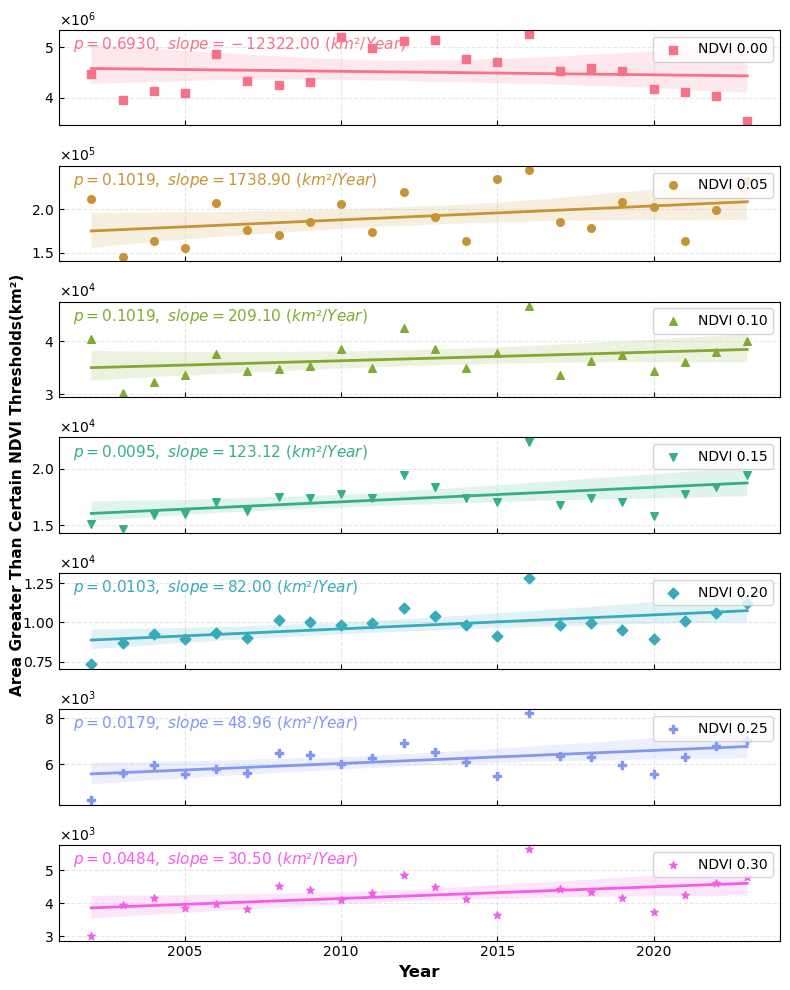

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymannkendall as mk
import matplotlib.ticker as mtick

# Load the data
df = pd.read_csv("G:/Hangkai/Antarctica_Mapping_Data/land_area_by_threshold.csv")
df.rename(columns={'Unnamed: 0': 'Year'}, inplace=True)
df_melt = df.melt(id_vars='Year', var_name='Threshold', value_name='Area')
df_melt['Threshold'] = df_melt['Threshold'].str.replace("NDVI_", "NDVI ")

# Set thresholds and colors
thresholds = sorted(df_melt['Threshold'].unique())
colors = sns.color_palette("husl", len(thresholds))
markers = ["s", "o", "^", "v", "D", "P", "*"] * 2

# Set up subplots
fig, axs = plt.subplots(len(thresholds), 1, figsize=(8, 10), sharex=True)

for i, threshold in enumerate(thresholds):
    ax = axs[i]
    data = df_melt[df_melt['Threshold'] == threshold]
    x = data['Year']
    y = data['Area']

    # Mann-Kendall trend test
    result = mk.original_test(y)
    p = result.p
    slope = result.slope
    
    # Relative rate (slope / area in first year)
    first_year_area = y.iloc[0]
    rate = slope / first_year_area * 100  # Convert to percentage

    # Format p-value
    p_str = f"{p:.4f}"

    # Annotation text
    """
    text_str = (
    f"$p = {p_str},\\ slope = {slope:.2f}\\ (\\mathrm{{km}}^2/\\mathrm{{Year}}),\\ "
    f"\\mathrm{{Rate}} = {rate:.2f}\\ \\left(\\%/\\mathrm{{Year}}\\right)$")
    """
    text_str = f"$p = {p_str}, \\ slope = {slope:.2f}$ $(km²/Year)$"
    
    # Plot
    ax.scatter(x, y, s=30, marker=markers[i], color=colors[i], label=threshold)
    sns.regplot(x=x, y=y, ax=ax, ci=95, scatter=False,
                line_kws={'color': colors[i], 'lw': 2})
    ax.text(0.02, 0.8, text_str, transform=ax.transAxes, fontsize=11, color=colors[i], fontweight='bold')

    # Only show y-label on the 4th subplot
    if i == 3:
        ax.set_ylabel("Area Greater Than Certain NDVI Thresholds(km²)", fontsize=11, fontweight='bold')
    else:
        ax.set_ylabel("")
        ax.set_yticklabels([])

    # Only show x-label on the last subplot
    if i == len(thresholds) - 1:
        ax.tick_params(labelbottom=True)
        ax.set_xlabel("Year", fontsize=12, fontweight='bold')
    else:
        ax.set_xlabel("")
        ax.tick_params(labelbottom=False)
        
    
    ax.legend(loc='upper right', fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.tick_params(labelsize=10, direction='in')
    ax.yaxis.set_major_formatter(mtick.ScalarFormatter(useMathText=True))
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Final touch
plt.tight_layout()
plt.show()